In [ ]:
import numpy as np
import os
current_directory = os.getcwd()
print(current_directory)

os.chdir('/home/jovyan/home/wakefinder/src/scripts')
import load as ld
import phys_quant as pq
import plots as pl
import rotations as rot
import regioncut as rc
from importlib import reload
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

## Chequeo de rotacion y carga datos

In [ ]:
# run if checking data files is needed
# import os
# data_script_dir = './'
# data_script_name = 'data_prep.py'
# path = os.path.join(data_script_dir, data_script_name)
# %run $path

In [ ]:

#lee los dataset ya verificada la rotacion
mw = ld.txt("mw_rot")
mw_lmc = ld.txt("mw_lmc_rot")
lmc = ld.txt("lmc_rot")


In [ ]:
# #Revisar que la operacion sea correcta
rel_lmc = pq.get_rot_orbit(lmc)

In [ ]:
reload(pl)
pl.surface_plot(rel_lmc_orbit, n_vector)

In [ ]:
reload(pl)

In [ ]:
pl.E_L(mw_lmc, 8000, 'x')

In [ ]:
# #Pruebas
# test_mw = np.random.rand(10,8)
# test_mw_lmc = np.random.rand(10,8)

In [ ]:
# test = pq.add_more_quant(test_mw, test_mw_lmc)

In [ ]:
#Agrega las cantidades fisicas al array de datos
# mw_halo, mw_lmc_halo = pq.add_more_quant(mw, mw_lmc)
# print("the shape of mw_halo is:", mw_halo.shape)
# print("the shape of mw_lmc_halo is:", mw_lmc_halo.shape)

In [ ]:
# #graficas orbitas LMC
pl.LMC_plot(rel_lmc, "xy")
pl.LMC_plot(rel_lmc, "xz")
pl.LMC_plot(rel_lmc, "yz")


In [ ]:
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'xy')
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'xz')
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'yz')

In [ ]:
#Grafica de la magnitud del momento angular vs radio
reload(pl)
pl.hist_r_l(mw)
# pl.hist_r_l(mw_lmc_halo)

In [ ]:
pl.hist_proj_r_l(mw,'yz')

# Primera seleccion

In [ ]:
#selecciona las particulas que estan en el rango de radio y momento angular
# low_L, ids_nopert = rc.threshold_L(mw_lmc_halo,5000,10000)
low_L, ids_nopert = rc.threshold_L(mw,0000,12000)

In [ ]:
mw_sel1 = np.copy(mw[low_L])
# mw_sel1 = np.copy(mw_lmc_halo[low_L])

print("the shape of mw_sel1", mw_sel1.shape)

In [ ]:
reload(pl)
pl.hist_L_r_low(mw_sel1[:,8], mw_sel1[:,10],'mw_sel1')


In [ ]:
ids_perthalo, common_ids = rc.get_ids(mw, mw_lmc, ids_nopert)
# ids_perthalo, common_ids = rc.get_ids(mw_lmc_halo, mw_halo, ids_nopert)

In [ ]:
# check if all selected particles are in the perturbed halo
# rc.test_ids(common_ids, mw_halo)

rc.test_ids(common_ids, mw_lmc)

In [ ]:
#select particles in the perturbed halo
mw_lmc_sel1 = np.copy(mw_lmc[ids_perthalo])
# mw_lmc_sel1 = np.copy(mw_halo[ids_perthalo])


In [ ]:
reload(pl)
pl.hist_r_l(mw_lmc_sel1,True,'mw_lmc_sel1')

# Segunda seleccion

In [ ]:
# sel2_part = rc.sel2(mw_lmc_sel1,220,50,13000,20000)
sel2_part = rc.sel2(mw_lmc_sel1,220,50,13000,25000)


In [ ]:
pl.hist_r_l(mw_lmc_sel1[sel2_part],True,'mw_lmc_sel2')

# Seleccion de particulas de la estela

In [ ]:
wake_particles_pert, wake_particles_no_pert = rc.selected_ids(mw_lmc_sel1, sel2_part, mw, mw_lmc)

# Graficas

In [ ]:
reload(pl)

In [ ]:
pl.plot_3d(wake_particles_pert, rel_lmc, 'DM wake pert part')
pl.plot_3d_plt(wake_particles_pert, rel_lmc, 'Perturbed halo DM wake candidates')


In [ ]:
# pl.plot_3d(wake_particles_no_pert, rel_lmc, 'DM wake no pert part')

In [ ]:
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"xy")
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"xz")
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"yz")

In [ ]:
pl.proj_xy(wake_particles_pert, rel_lmc)

In [ ]:
pl.proj_xz(wake_particles_pert, rel_lmc)

In [ ]:
pl.proj_yz(wake_particles_pert, rel_lmc)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'xz',150)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'yz',150)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'xy',150)


In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'xy')

In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'xz')

In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'yz')


In [ ]:
reload(pl)
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'xy')
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'yz')
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'xz')

In [ ]:
pl.density_contour_plt(wake_particles_no_pert,rel_lmc, 'yz')
pl.density_contour_plt(wake_particles_pert,rel_lmc, 'yz')

In [ ]:
pl.vector_field_plt(wake_particles_pert, rel_lmc, 'yz',20,2500,0.005, True)
pl.vector_field_plt(wake_particles_no_pert, rel_lmc, 'yz',10,2500,0.005, False)

In [ ]:
pl.vector_field_plt(wake_particles_pert, rel_lmc, 'yz',20,2500,0.005, True)

In [ ]:
reload(pl)
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'xy',8,1500,0.005)
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'yz',8,1500,0.005)
# Hacer zoom 
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'xz',8,1500,0.005)

In [ ]:
pl.hist_orbit_plt(wake_particles_pert, rel_lmc, 'yz',8,3000,0.005, True)
pl.hist_orbit_plt(wake_particles_no_pert, rel_lmc, 'yz',8,3000,0.005, False)


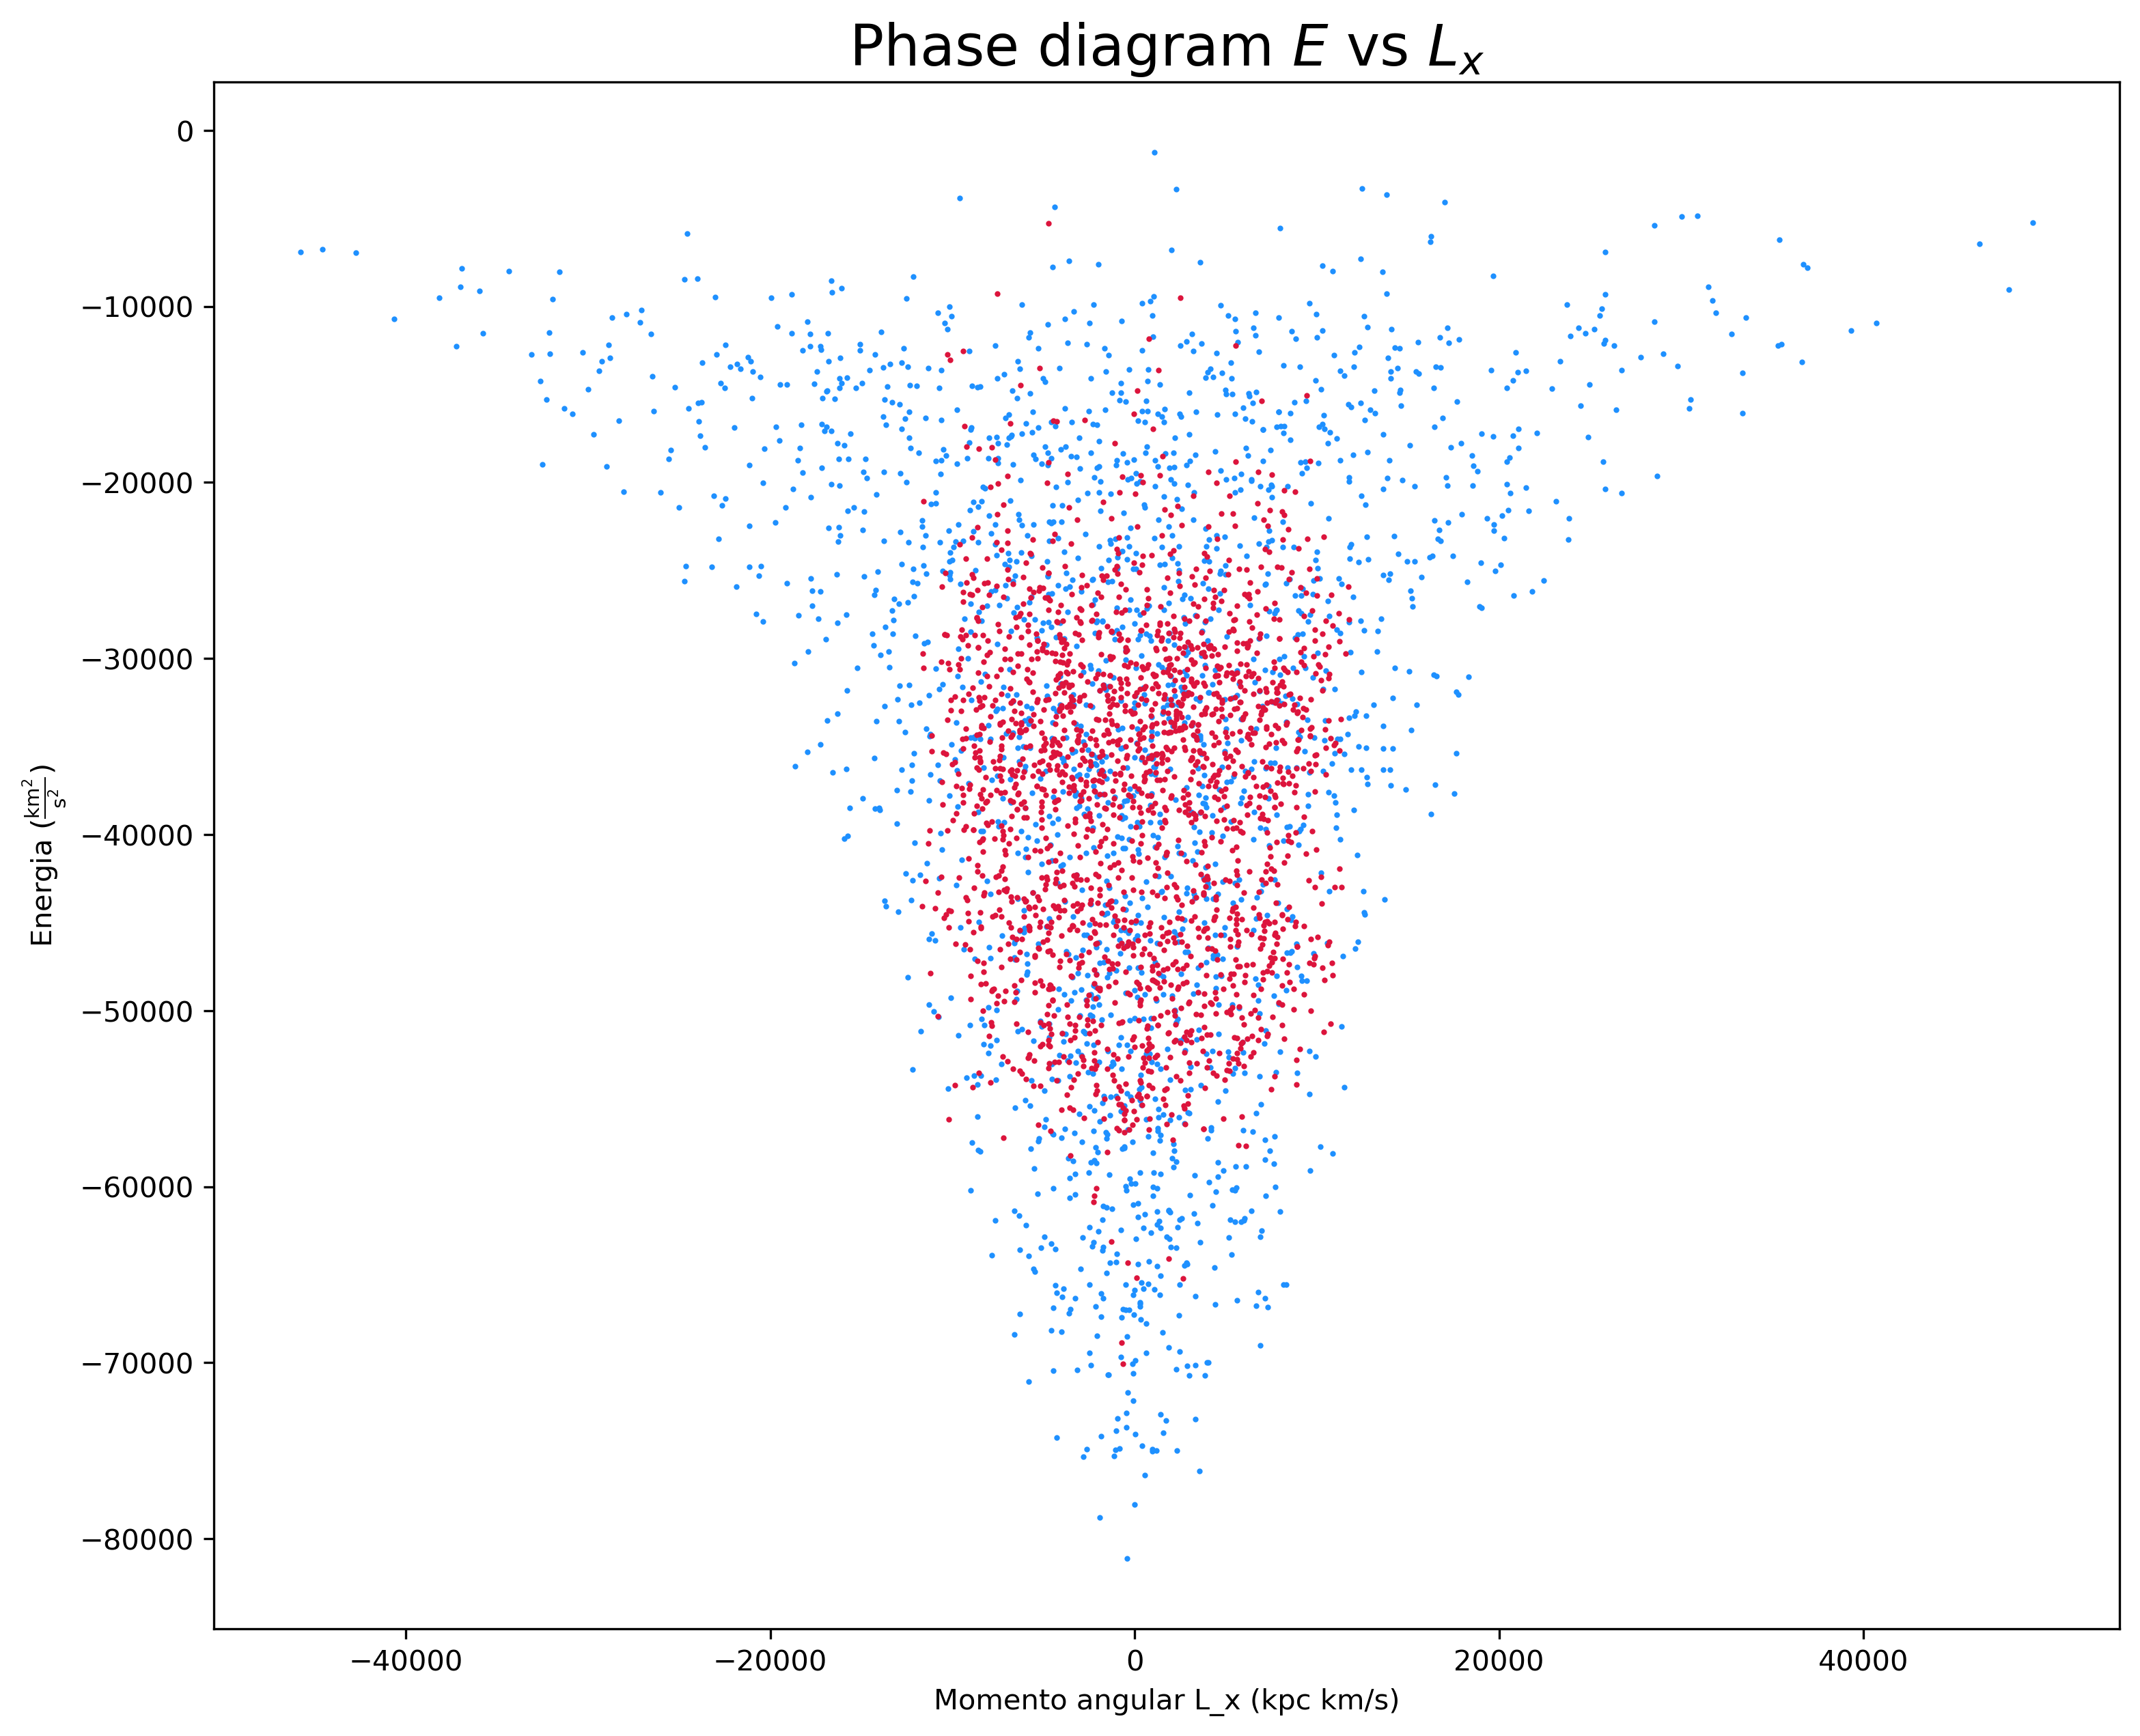

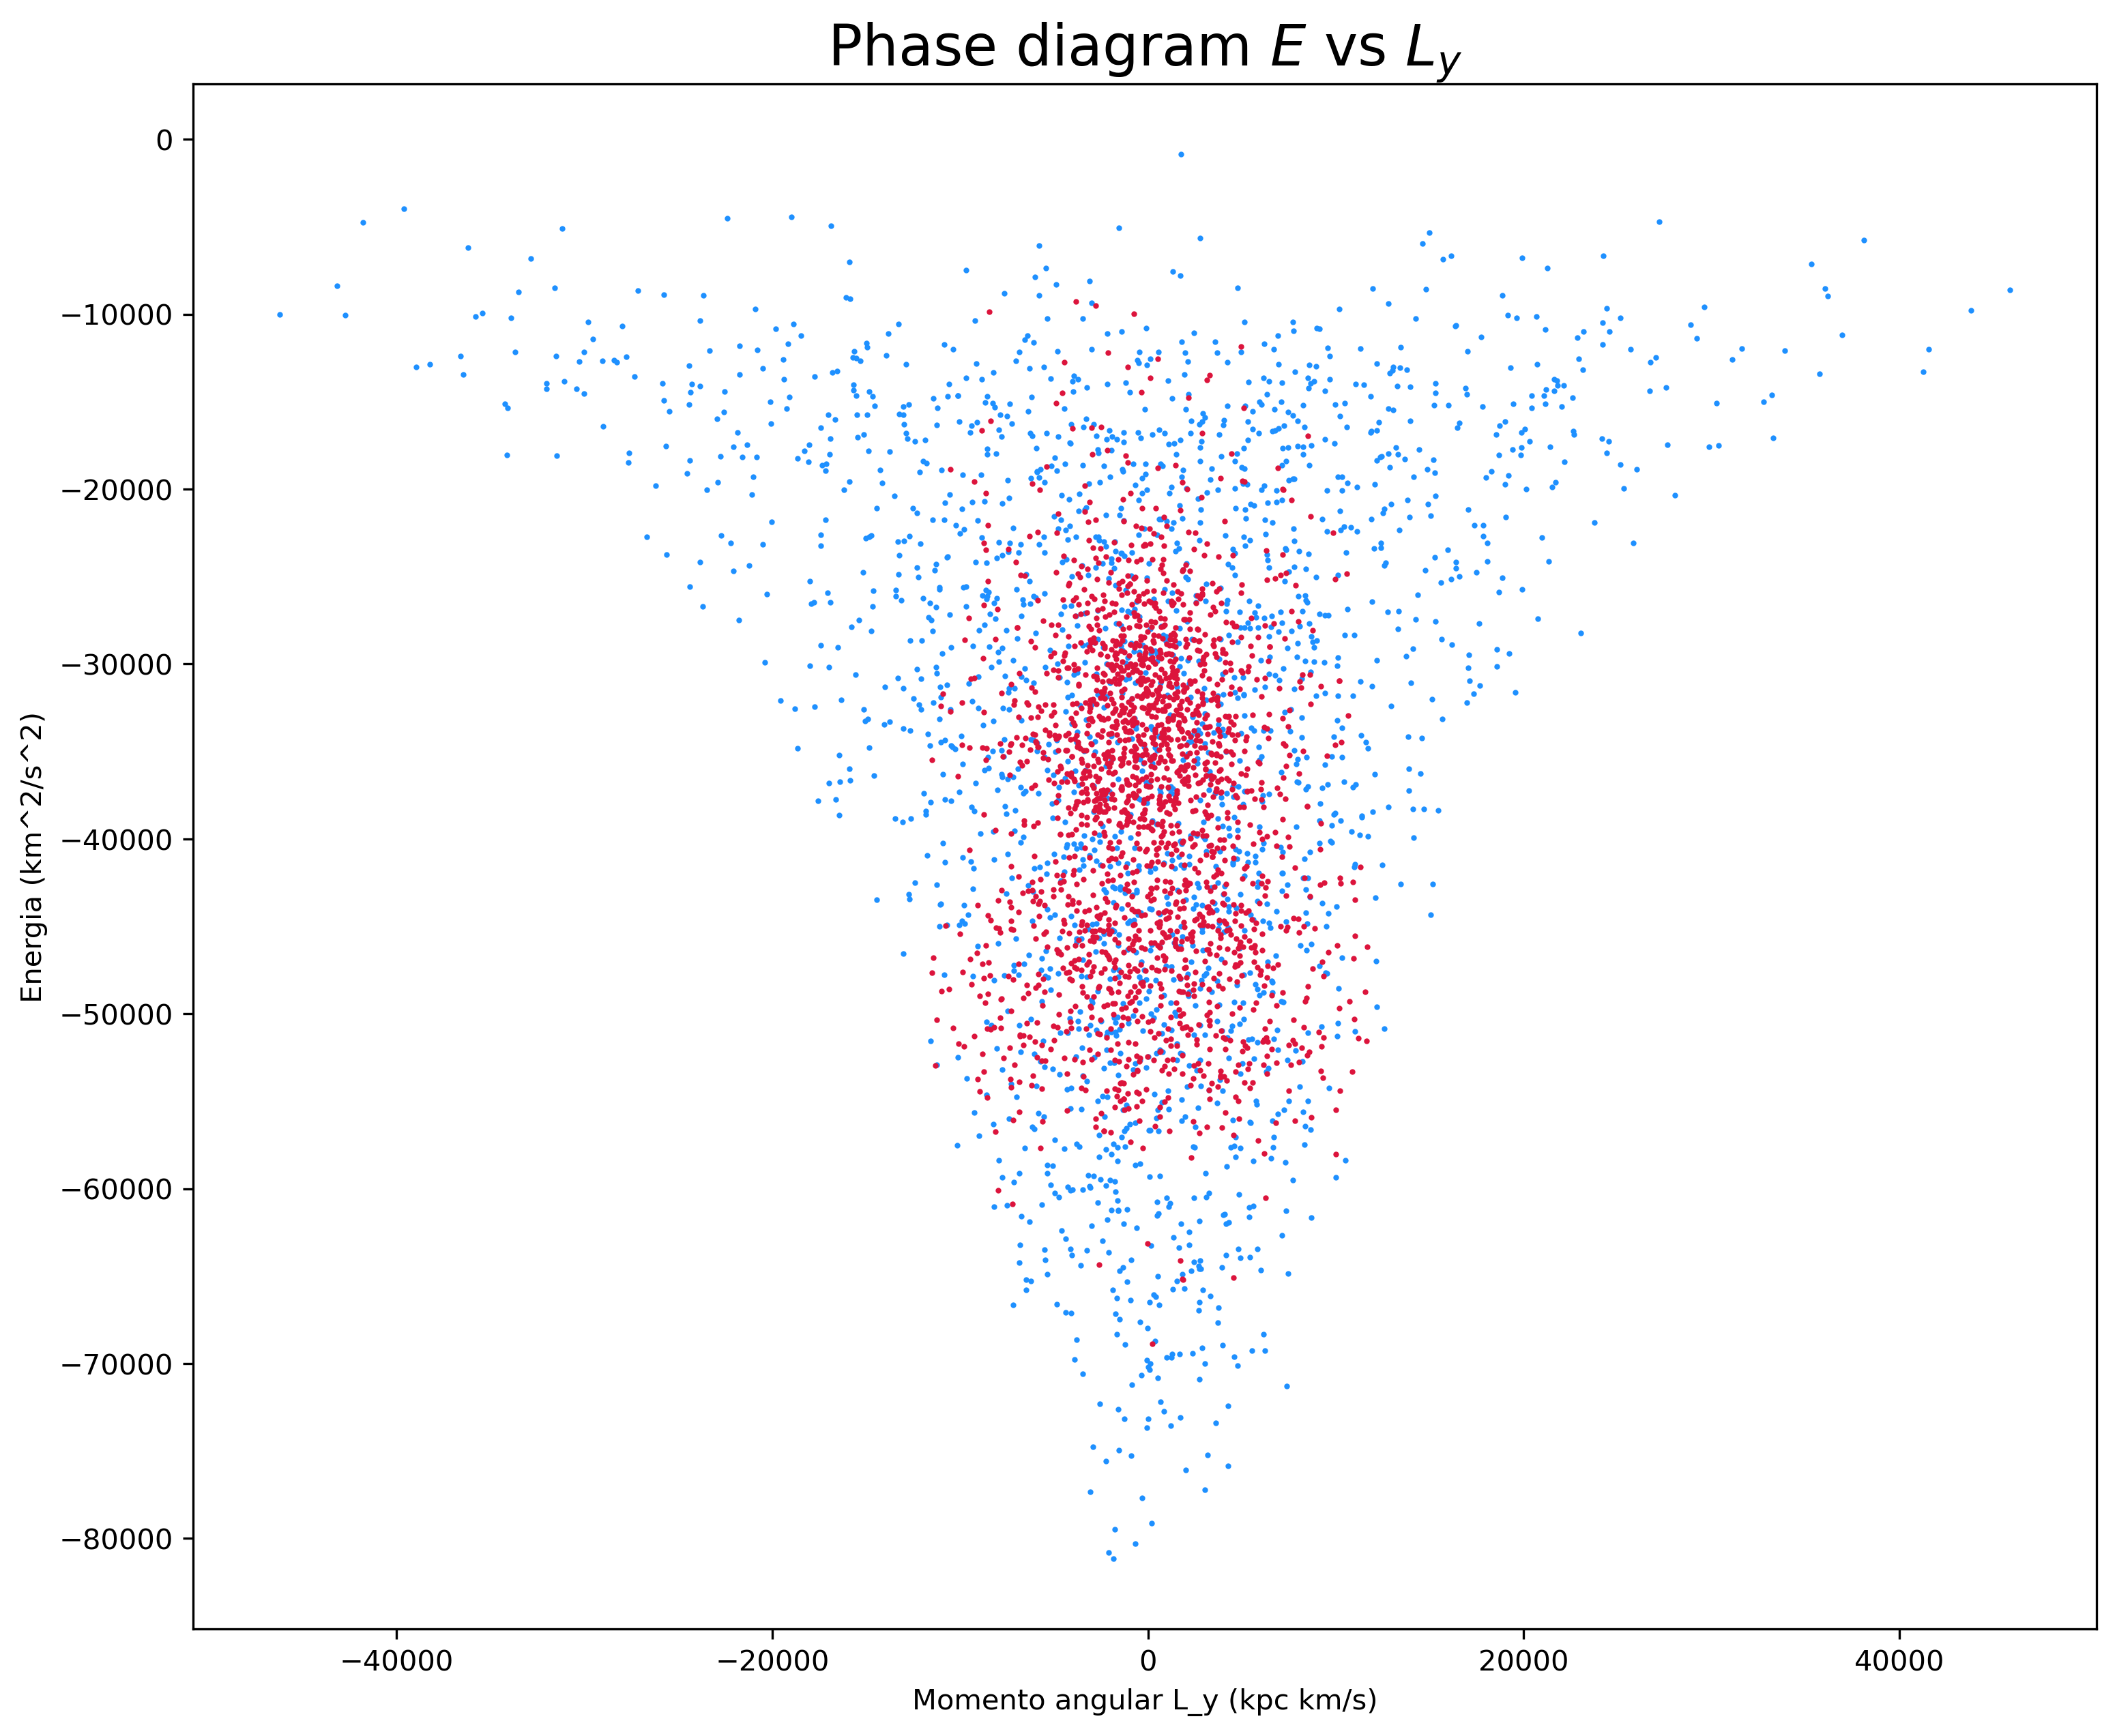

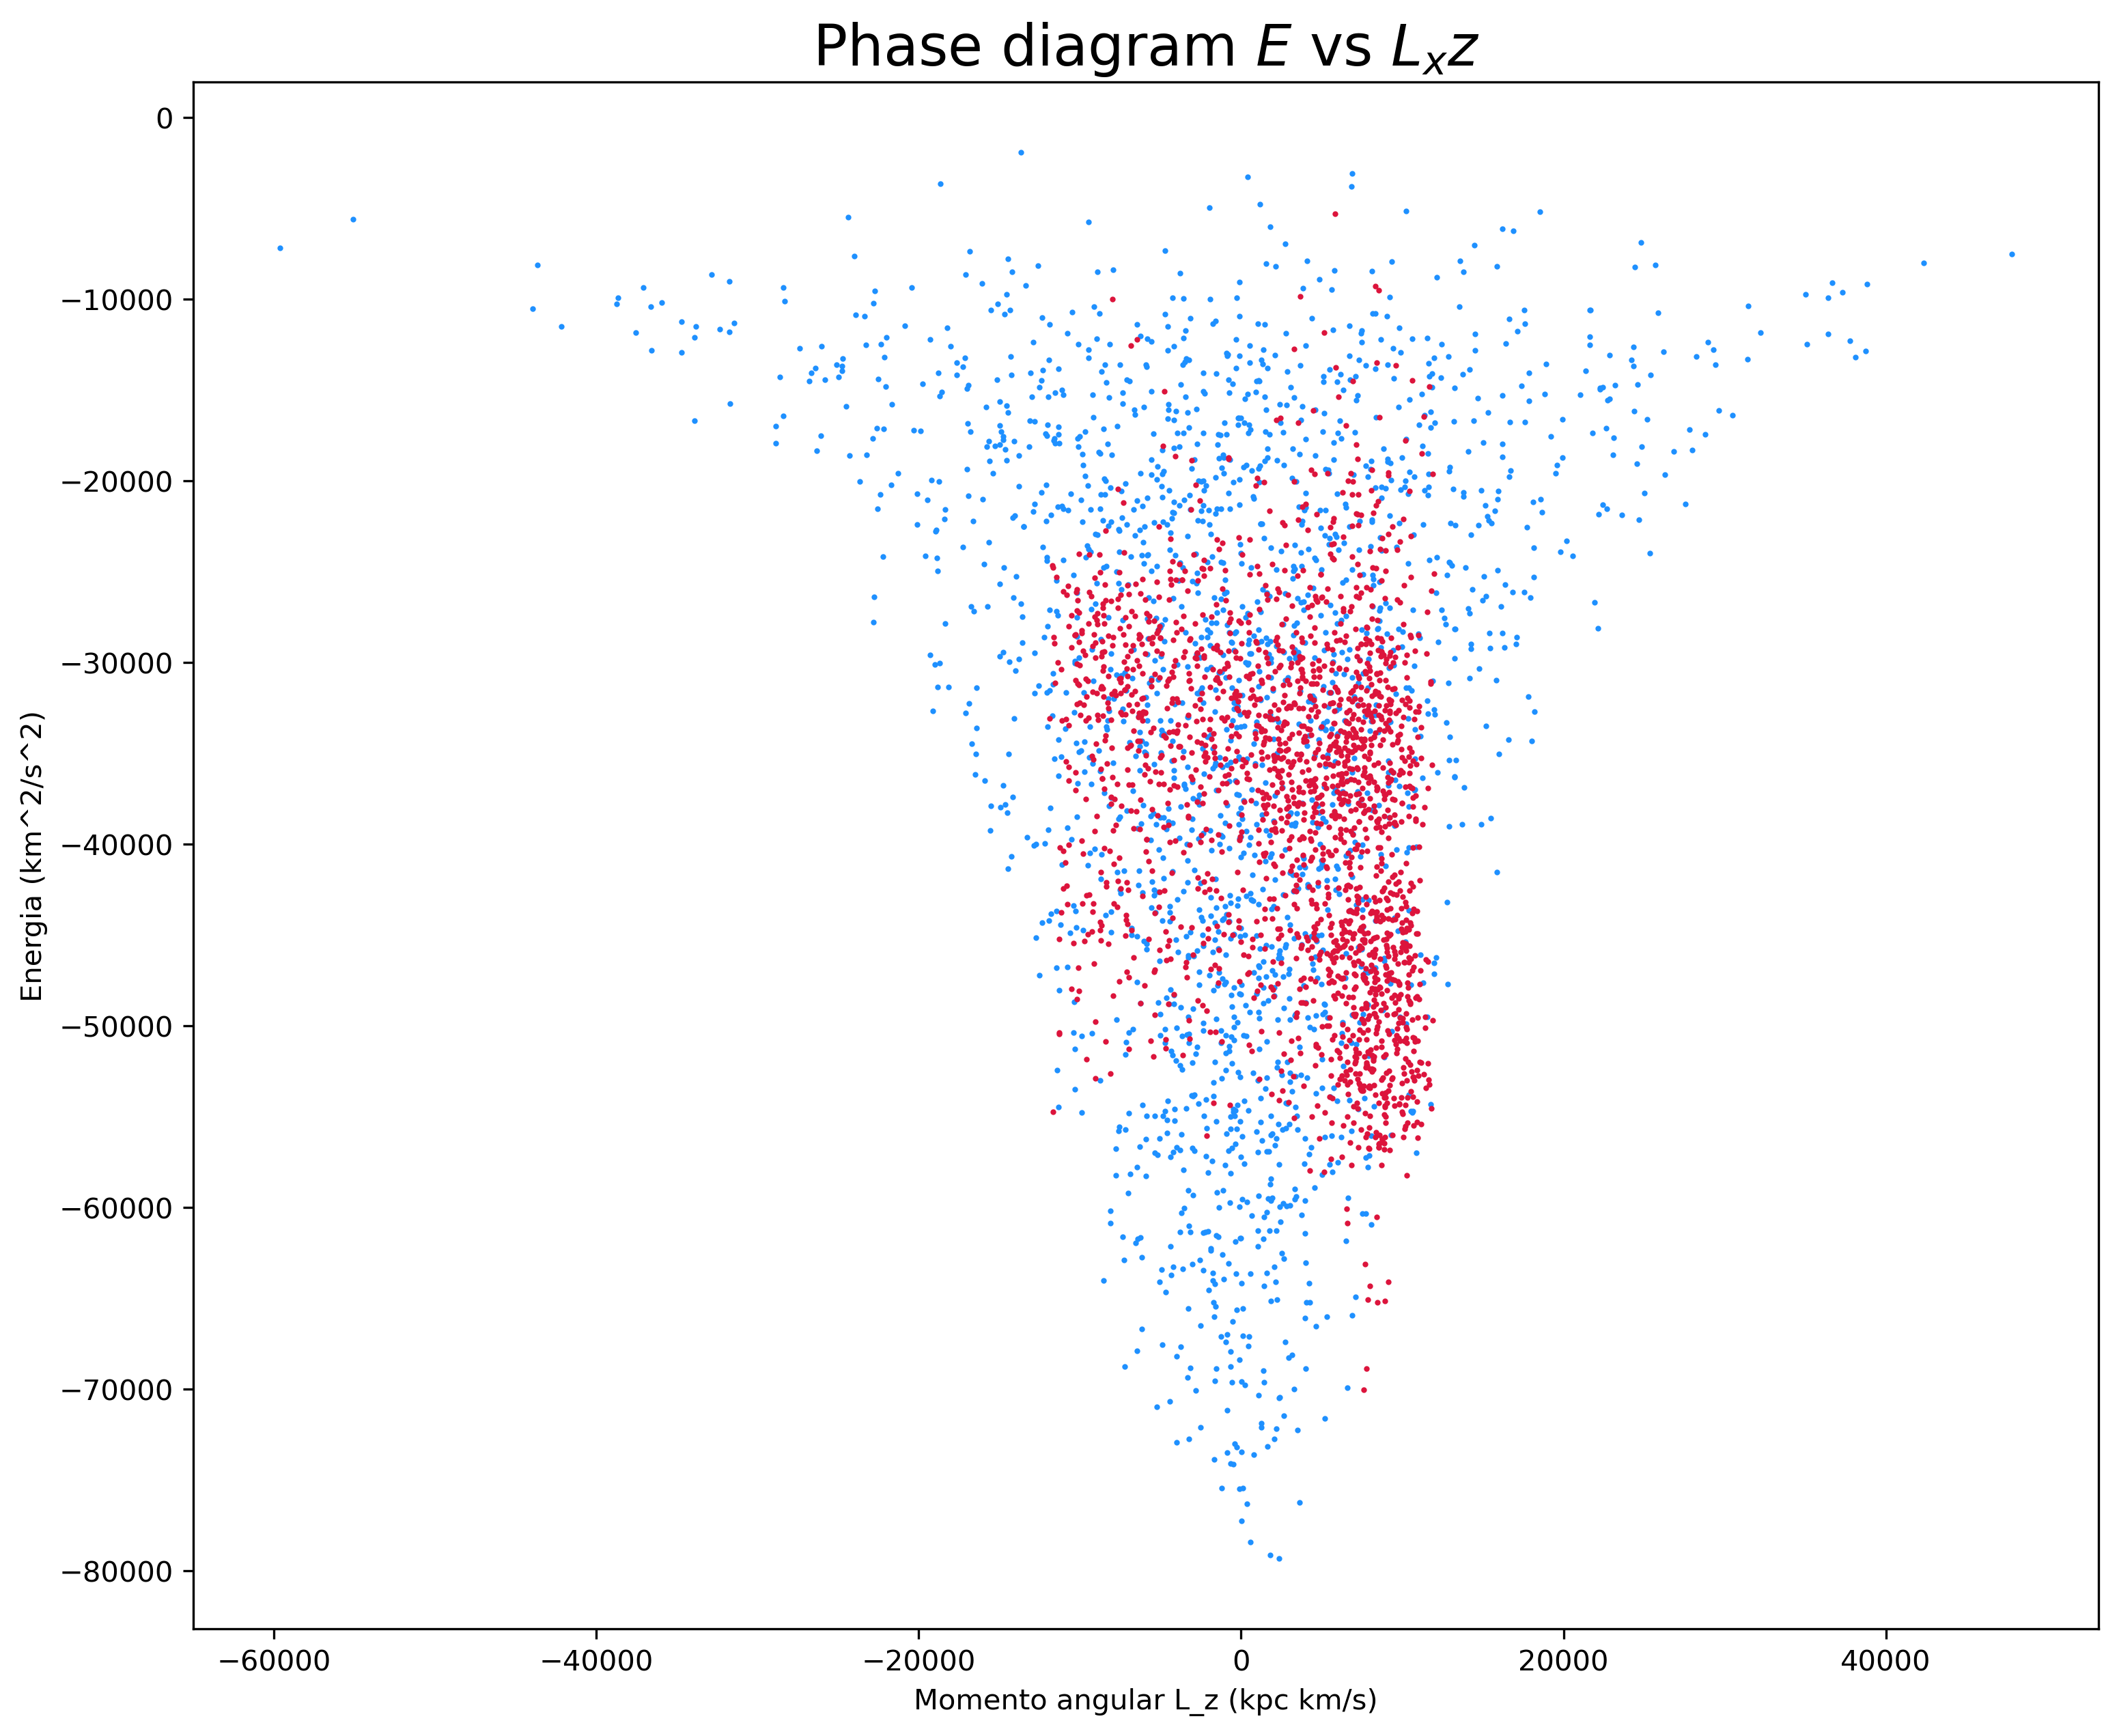

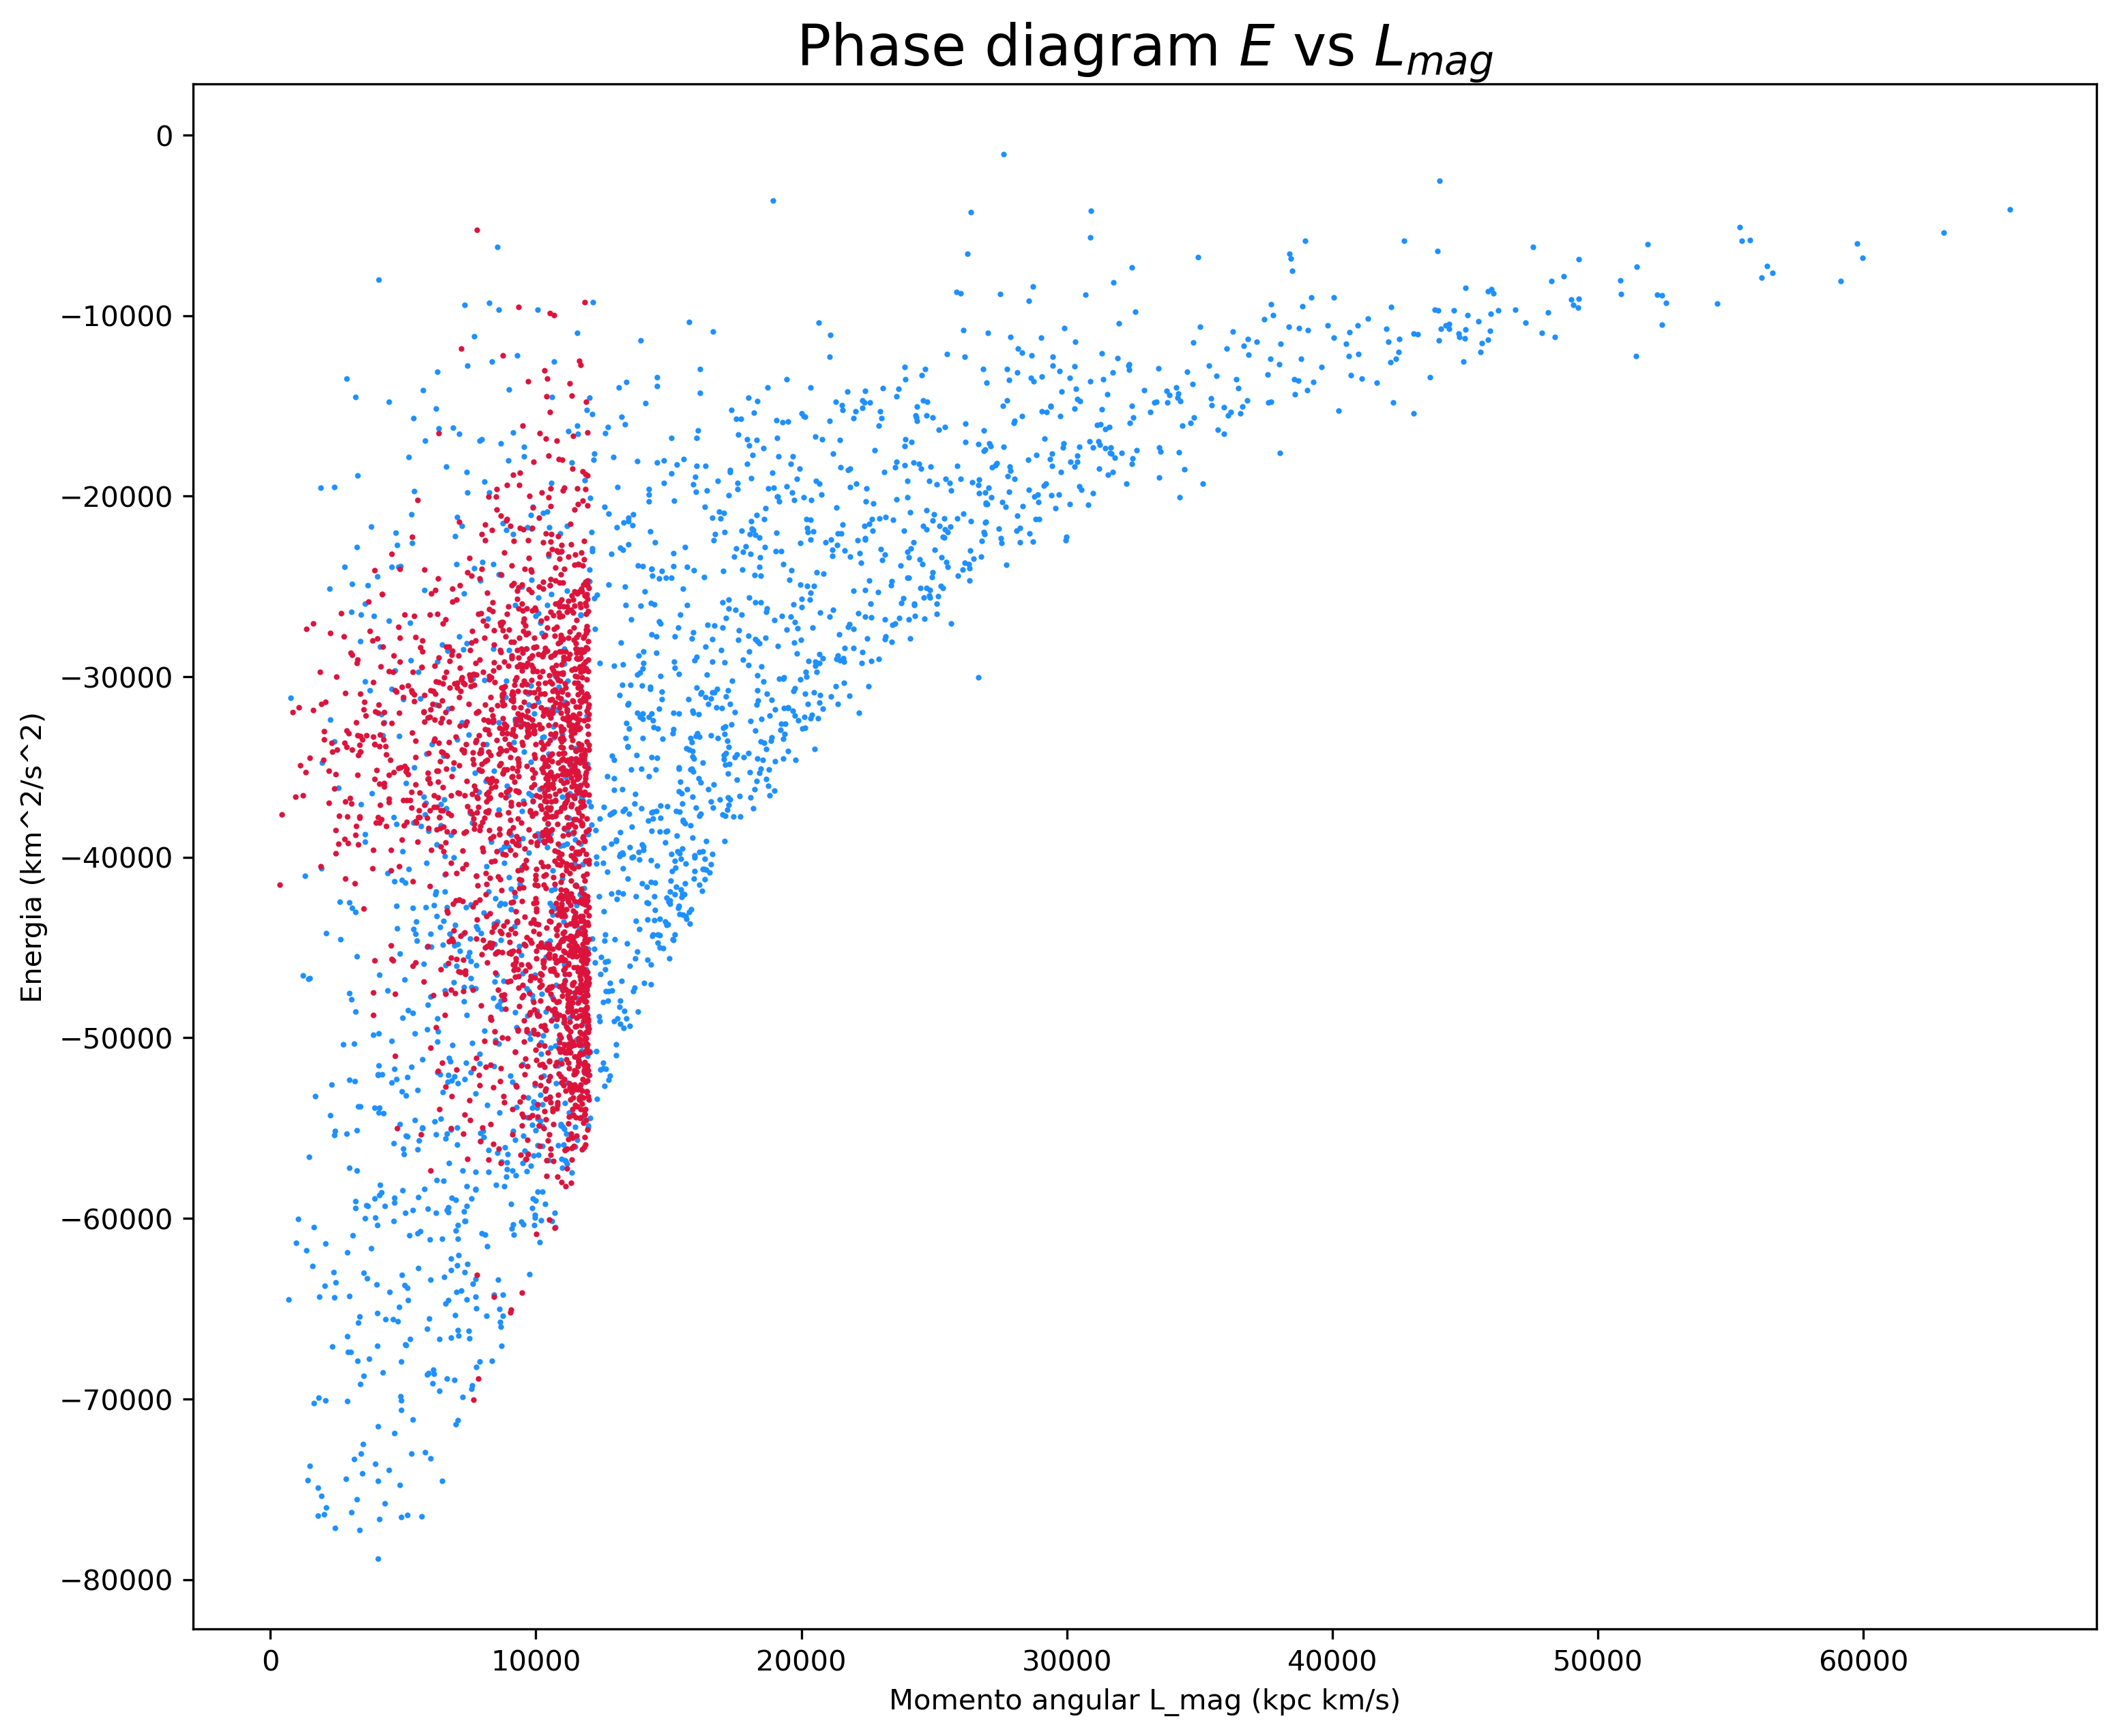

ValueError: Cannot take a larger sample than population when 'replace=False'

In [239]:
reload(pl)
pl.E_L(mw,  'x', 'scatter', wake_particles_no_pert, 2000)
pl.E_L(mw,  'y', 'scatter', wake_particles_no_pert, 2000)
pl.E_L(mw,  'z', 'scatter', wake_particles_no_pert, 2000)
pl.E_L(mw,  'mag', 'scatter', wake_particles_no_pert, 2000)

pl.E_L(mw,  'x', 'hist', wake_particles_no_pert)
# pl.E_L(wake_particles_no_pert, 1000, 'xz')


# Generalizacion

In [ ]:
sel2_sel3 = rc.L_delta(wake_particles_pert, wake_particles_no_pert, 200)
pl.sel3(sel2_sel3, rel_lmc, 'xz')
pl.sel3(sel2_sel3, rel_lmc, 'yz')
pl.sel3(sel2_sel3, rel_lmc, 'xy')

In [ ]:
pl.plot_3d(sel2_sel3, rel_lmc, "Seleccion 3")

In [ ]:
sel1_sel3 = rc.L_delta(mw_lmc_sel1, mw_sel1, 900)
pl.sel3(sel1_sel3, rel_lmc, 'xz')
pl.sel3(sel1_sel3, rel_lmc, 'yz')
pl.sel3(sel1_sel3, rel_lmc, 'xy')



In [ ]:
pl.plot_3d(sel1_sel3, rel_lmc, "Seleccion 3")

In [ ]:
L_mag_delta_rot = rc.L_mag_delta(mw_lmc_sel1[:,10] , mw_sel1[:,10])
L_mag_delta = np.copy(L_mag_delta_rot[:,np.newaxis])
print("the shape of L_mag_delta_rot", L_mag_delta.shape)
print("L_mag", wake_particles_pert[:,10].shape)